In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [2]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW2/"
#
# Training
#
masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize2/*_training_resized_training.tif"))

# Import data
print('Loading training dataset...\n')

X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

#
X_data=np.array(X_data)
Y_data=np.array(Y_data)
#

Loading training dataset...



In [3]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_data_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_data[i,...,0])
    X_data_std.append(img_std)

#
X_data_std=np.array(X_data_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
print("TRAIN data  shape (Scaled):", X_data_std.shape)

print("TRAIN data  shape:", X_data.shape)
print("TRAIN label shape:", Y_data.shape)

TRAIN data  shape (Scaled): (20, 460, 460)
TRAIN data  shape: (20, 460, 460, 3)
TRAIN label shape: (20, 460, 460)


In [5]:
#
masks_Testing = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_manual1_resized_mask.gif"))
imgs_Testing  = sorted(glob.glob(DATA_ROOT+"/testData_tftf/resize2/*_test_resized_testing.tif"))

# Import data
print('Loading testing dataset...\n')

X_test=[]
for index,entry in enumerate(imgs_Testing):
    img = misc.imread(entry)
    X_test.append(img)

Y_test=[]
for index,entry in enumerate(masks_Testing):
    img = misc.imread(entry)
    Y_test.append(img)

#
X_test=np.array(X_test)
Y_test=np.array(Y_test)
#

Loading testing dataset...



In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_test_std=[]
for i in range(0,20):
    img_std = stdsc.fit_transform(X_test[i,...,0])
    X_test_std.append(img_std)

#
X_test_std=np.array(X_test_std)
#

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
print("TEST data  shape (Scaled):", X_test_std.shape)

print("TEST  data  shape:", X_test.shape)
print("TEST  label shape:", Y_test.shape)

TEST data  shape (Scaled): (20, 460, 460)
TEST  data  shape: (20, 460, 460, 3)
TEST  label shape: (20, 460, 460)


/anaconda/envs/py35/lib/python3.5/site-packages/keras/preprocessing/image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (20, 1, 460, 460) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


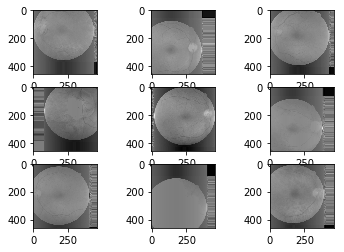

In [9]:
#
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
#
# reshape to be [samples][pixels][width][height]
X_data_std = X_data_std.reshape(X_data_std.shape[0], 1, 460, 460)
X_test_std = X_test_std.reshape(X_test_std.shape[0], 1, 460, 460)
# convert from int to float
X_data_std = X_data_std.astype('float32')
X_test_std = X_test_std.astype('float32')
#
Y_data = Y_data.astype(np.bool)
Y_test = Y_test.astype(np.bool)
#
# Standardize images across the dataset, mean=0, stdev=1
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# Random Rotations
datagen = ImageDataGenerator(rotation_range=90)

# Random Shifts
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# Random Flips
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#
# fit parameters from data
datagen.fit(X_data_std)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_data_std, Y_data, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(460,460), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break